In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read,Display and Write an image

In [2]:
# import the cv2 library
import cv2
 
# The function cv2.imread() is used to read an image.
image='../Deeplearning/images/flower.jpg'
img_grayscale = cv2.imread(image,0)
 
# The function cv2.imshow() is used to display an image in a window.
cv2.imshow('graycsale image',img_grayscale)
 
# waitKey() waits for a key press to close the window and 0 specifies indefinite loop
cv2.waitKey(0)
 
# cv2.destroyAllWindows() simply destroys all the windows we created.
cv2.destroyAllWindows()
 
# The function cv2.imwrite() is used to write an image.
cv2.imwrite('grayscale.jpg',img_grayscale)

True

# Display all three images

In [ ]:
img_color = cv2.imread(image,1)
img_grayscale = cv2.imread(image,0)
img_unchanged = cv2.imread(image,-1)

#Displays image inside a window
cv2.imshow('color image',img_color)  
cv2.imshow('grayscale image',img_grayscale)
cv2.imshow('unchanged image',img_unchanged)
 
# Waits for a keystroke
cv2.waitKey(0)  
 
# Destroys all the windows created
cv2.destroyAllWindows()

# Resizing

In [ ]:
import cv2
import numpy as np
 
# Read the image using imread function
image = cv2.imread(image)
cv2.imshow('Original Image', image)
 
# let's downscale the image using new  width and height
down_width = 300
down_height = 200
down_points = (down_width, down_height)
resized_down = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)
 
# let's upscale the image using new  width and height
up_width = 1500
up_height = 900
up_points = (up_width, up_height)
resized_up = cv2.resize(image, up_points, interpolation= cv2.INTER_LINEAR)
 
# Display images
cv2.imshow('Resized Down by defining height and width', resized_down)
cv2.waitKey()
cv2.imshow('Resized Up image by defining height and width', resized_up)
cv2.waitKey()
 
#press any key to close the windows
cv2.destroyAllWindows()

In [ ]:
images=[image,resized_down,resized_up]
title=["Original",'resized_down','resized_up']
for i in range(3):
    plt.title(title[i], size=20)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.show()
#     plt.axis('off')

# cropping

- Cropping applications, crop the Region of intereset in computer vision, Example Face detection

In [ ]:
cropped_image = image[200:550, 250:650] # Slicing to crop the image
 
# Display the cropped image
cv2.imshow("cropped", cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows() 

# Rotation

- First, you need to get the center of rotation. This typically is the center of the image you are trying to rotate.
- Next, create the 2D-rotation matrix. OpenCV provides the getRotationMatrix2D() function that we discussed above. 
- Finally, apply the affine transformation to the image, using the rotation matrix you created in the previous step. The warpAffine() function in OpenCV does the job.

In [ ]:
# dividing height and width by 2 to get the center of the image
height, width = image.shape[:2]
# get the center coordinates of the image to create the 2D rotation matrix
center = (width/2, height/2)
 
# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)
 
# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))
 
cv2.imshow('Original image', image)
cv2.imshow('Rotated image', rotated_image)
# wait indefinitely, press any key on keyboard to exit
cv2.waitKey(0)
# save the rotated image to disk
cv2.imwrite('rotated_image.jpg', rotated_image)

# Translation

- First, read the image and obtain its width and height.
- create a transformation matrix, which is a 2D array. This matrix contains the information needed to shift the image, along the x and y axes.
- Use the warpAffine() function, in this final step, to apply the affine transformation.


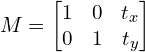

In [ ]:
# get tx and ty values for translation
# you can specify any value of your choice
tx, ty = width / 4, height / 4
 
# create the translation matrix using tx and ty, it is a NumPy array 
translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty]
], dtype=np.float32)

# apply the translation to the image
translated_image = cv2.warpAffine(src=image, M=translation_matrix, dsize=(width, height))

# display the original and the Translated images
cv2.imshow('Translated image', translated_image)
cv2.imshow('Original image', image)
cv2.waitKey(0)
# save the translated image to disk
cv2.imwrite('translated_image.jpg', translated_image)


# Blurring

### Conv2D filter

In [ ]:
"""
Apply blurring kernel
"""
# imagepath=r"C:\Users\rajbo\Downloads\SRM_MTech\Deeplearning\images\earthfromsky.jpg"
image = cv2.imread('../Deeplearning/images/noise.png')
kernel2 = np.ones((5, 5), np.float32) / 25
img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel2)
 
cv2.imshow('Original', image)
cv2.imshow('Kernel Blur', img)
 
cv2.waitKey(0)
cv2.imwrite('blur_kernel.jpg', img)
cv2.destroyAllWindows()

In [ ]:
plt.gray()
images = [image, img]
titles = ['original input', 'after convolution blurring']
for i in range(2):
    plt.figure(figsize=(20,10))
    plt.title(titles[i], size=20)
    plt.imshow(images[i])
    plt.show()

### Gausian Blurring

- The first argument, src, specifies the source image that you want to filter.
- The second argument is ksize, which defines the size of the Gaussian kernel. Here, we are using a 5×5 kernel.
- The final two arguments are sigmaX and sigmaY, which are both set to 0. These are the Gaussian kernel standard deviations, in the X (horizontal) and Y (vertical) direction.

In [ ]:
"""
Apply Gaussian blur
"""
# sigmaX is Gaussian Kernel standard deviation 
# ksize is kernel size
gaussian_blur = cv2.GaussianBlur(src=image, ksize=(5,5),sigmaX=0, sigmaY=0)
 
cv2.imshow('Original', image)
cv2.imshow('Gaussian Blurred', gaussian_blur)
     
cv2.waitKey()
cv2.imwrite('gaussian_blur.jpg', gaussian_blur)
cv2.destroyAllWindows()

In [ ]:
### Median Blurring

In [ ]:
"""
Apply Median blur
"""
# medianBlur() is used to apply Median blur to image
# ksize is the kernel size
median = cv2.medianBlur(src=image, ksize=5)
 
cv2.imshow('Original', image)
cv2.imshow('Median Blurred', median)
     
cv2.waitKey()
cv2.imwrite('median_blur.jpg', median)
cv2.destroyAllWindows()

In [ ]:
def plot_bur(dst):
    img = cv2.imread('../Deeplearning/images/noise.png')    
    blur = dst
    plt.figure(figsize=(15, 7))
    plt.subplot(121),plt.imshow(img),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(blur),plt.title('blurring')
    plt.xticks([]), plt.yticks([])
    plt.show()

In [ ]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plot_bur(dst)

In [ ]:
dst = cv2.filter2D(img,-1,kernel)
plot_bur(dst)

In [ ]:
median=cv2.medianBlur(img,5)
plot_bur(median)

In [ ]:
gausian_blur = cv2.GaussianBlur(img,(5,5),0)
plot_bur(gausian_blur)

In [ ]:
bilateral_blur = cv2.bilateralFilter(img,9,75,75)
plot_bur(bilateral_blur)

# Histgram equalization

In [3]:
def plot_image(image, title=''):
    plt.title(title, size=20), plt.imshow(image)
    plt.axis('off') # comment this line if you want axis ticks

In [4]:
# Histogram Equalization

In [5]:
imgpath=r"C:\Users\rajbo\Downloads\SRM_MTech\Deeplearning\images\earthfromsky.jpg"
# load the image and convert it to grayscale
image = cv2.imread(imgpath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# apply histogram equalization to stretch the contrast of our image
image_eq = cv2.equalizeHist(image)


<Figure size 432x288 with 0 Axes>

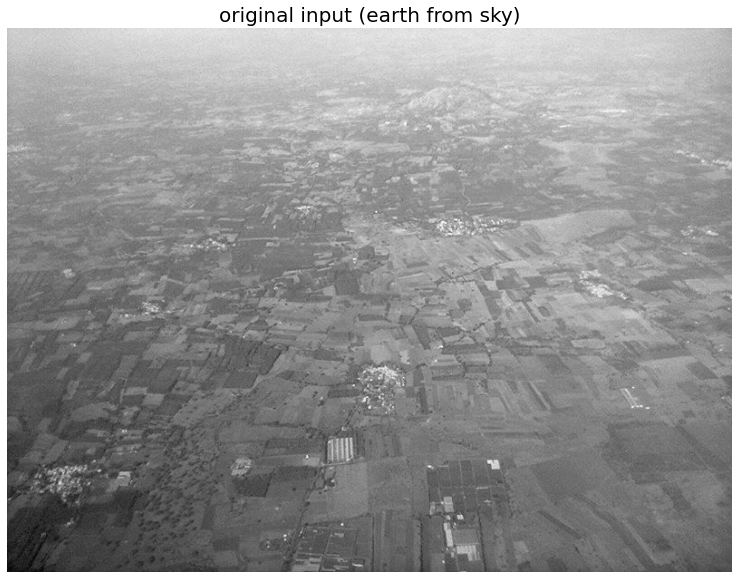

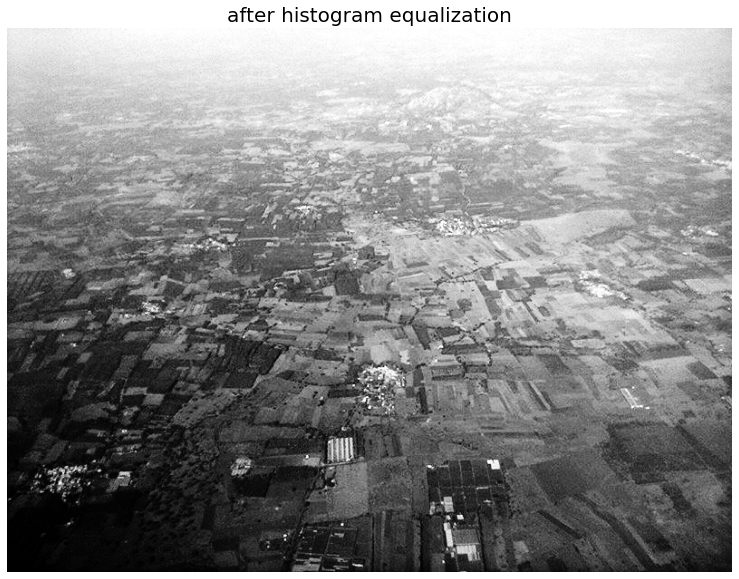

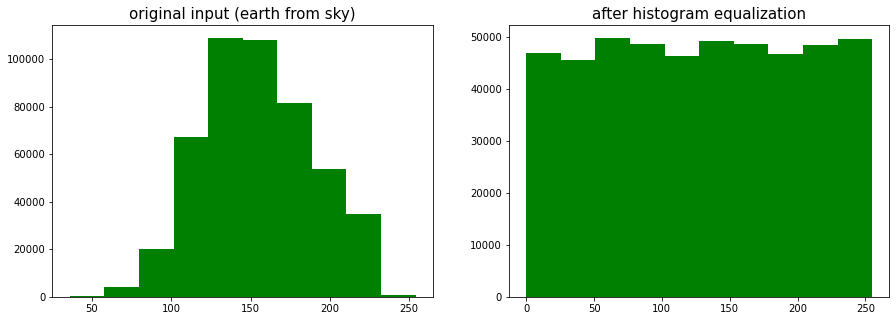

In [6]:
plt.gray()
images = [image, image_eq]
titles = ['original input (earth from sky)', 'after histogram equalization']
for i in range(2):
    plt.figure(figsize=(20,10)), plot_image(images[i], titles[i])
plt.figure(figsize=(15,5))
for i in range(2):
    plt.subplot(1,2,i+1), plt.hist(images[i].ravel(), color='g'), plt.title(titles[i], size=15)
plt.show()

In [8]:
# import matplotlib
# from skimage import io,exposure,img_as_float
# import numpy as np
# matplotlib.rcParams['font.size'] = 8
# def plot_image_and_hist(image, axes, bins=256):
#     image = img_as_float(image)
#     axes_image, axes_hist = axes
#     axes_cdf = axes_hist.twinx()
#     axes_image.imshow(image, cmap=plt.cm.gray)
#     axes_image.set_axis_off()
#     axes_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
#     axes_hist.set_xlim(0, 1)
#     axes_hist.set_xlabel('Pixel intensity', size=15)
#     axes_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
#     axes_hist.set_yticks([])
#     image_cdf, bins = exposure.cumulative_distribution(image, bins)
#     axes_cdf.plot(bins, image_cdf, 'r')
#     axes_cdf.set_yticks([])
#     return axes_image, axes_hist, axes_cdf
# # Deeplearning\images
# im = io.imread('../Deeplearning/images/beans_g.png')
# # contrast stretching
# im_rescale = exposure.rescale_intensity(im, in_range=(0, 100), out_range=(0, 255))
# im_eq = exposure.equalize_hist(im) # histogram equalization
# im_adapteq = exposure.equalize_adapthist(im, clip_limit=0.03) # adaptive histogram equalization

# fig = plt.figure(figsize=(15, 7))
# axes = np.zeros((2, 4), dtype = np.object)
# axes[0, 0] = fig.add_subplot(2, 4, 1)
# for i in range(1, 4):
#     axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
# for i in range(0, 4):
#     axes[1, i] = fig.add_subplot(2, 4, 5+i)
# axes_image, axes_hist, axes_cdf = plot_image_and_hist(im, axes[:, 0])
# axes_image.set_title('Low contrast image', size=20)
# y_min, y_max = axes_hist.get_ylim()
# axes_hist.set_ylabel('Number of pixels', size=20)
# axes_hist.set_yticks(np.linspace(0, y_max, 5))
# axes_image, axes_hist, axes_cdf = plot_image_and_hist(im_rescale, axes[:,1])
# axes_image.set_title('Contrast stretching', size=20)
# axes_image, axes_hist, axes_cdf = plot_image_and_hist(im_eq, axes[:, 2])
# axes_image.set_title('Histogram equalization', size=20)
# axes_image, axes_hist, axes_cdf = plot_image_and_hist(im_adapteq, axes[:,3])
# axes_image.set_title('Adaptive equalization', size=20)
# axes_cdf.set_ylabel('Fraction of total intensity', size=20)
# axes_cdf.set_yticks(np.linspace(0, 1, 5))
# fig.tight_layout()
# plt.show()

In [10]:
img = cv2.imread('../Deeplearning/images/tiger.jpg') 
# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)
 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images

# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)
 
# Canny Edge Detection
cannyedge = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', cannyedge)
cv2.waitKey(0)
 
cv2.destroyAllWindows()

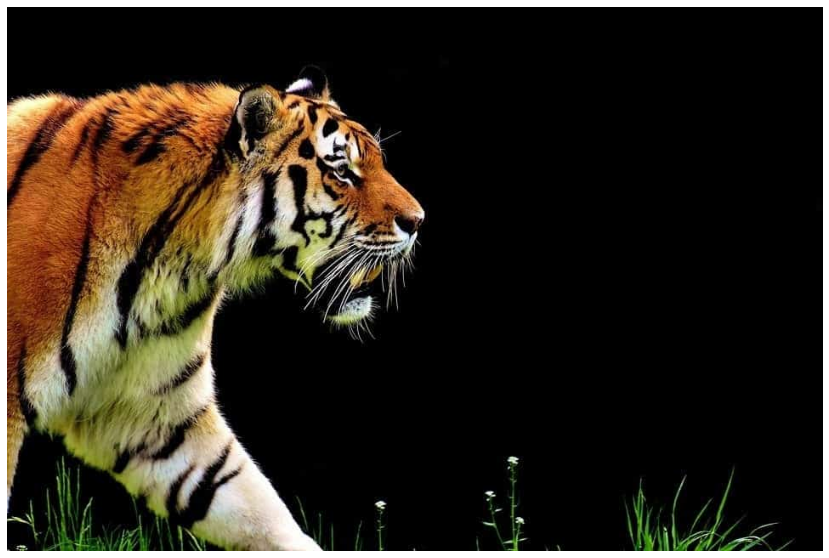

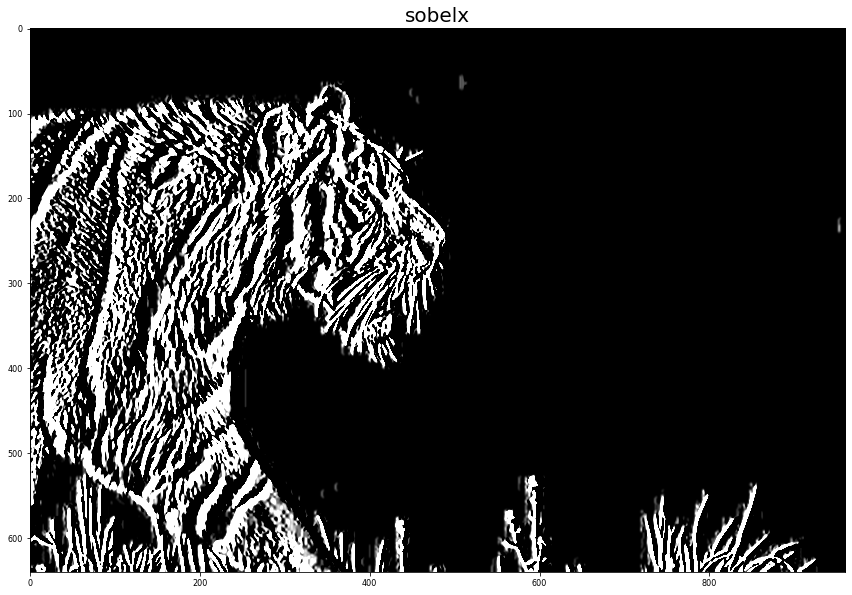

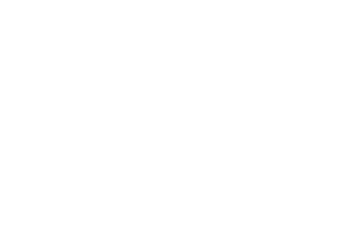

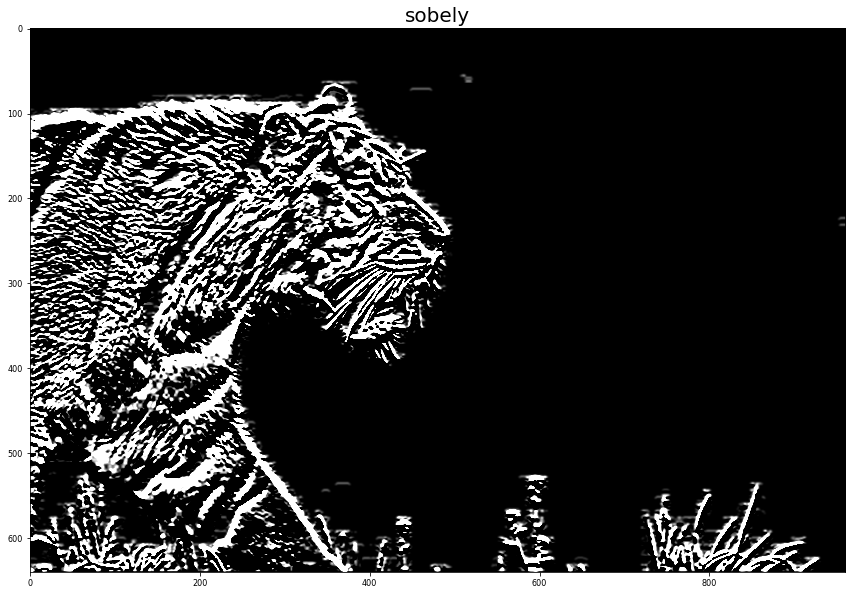

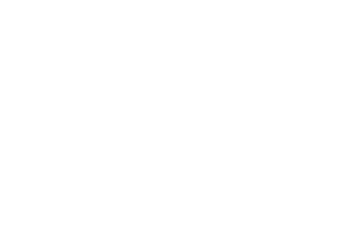

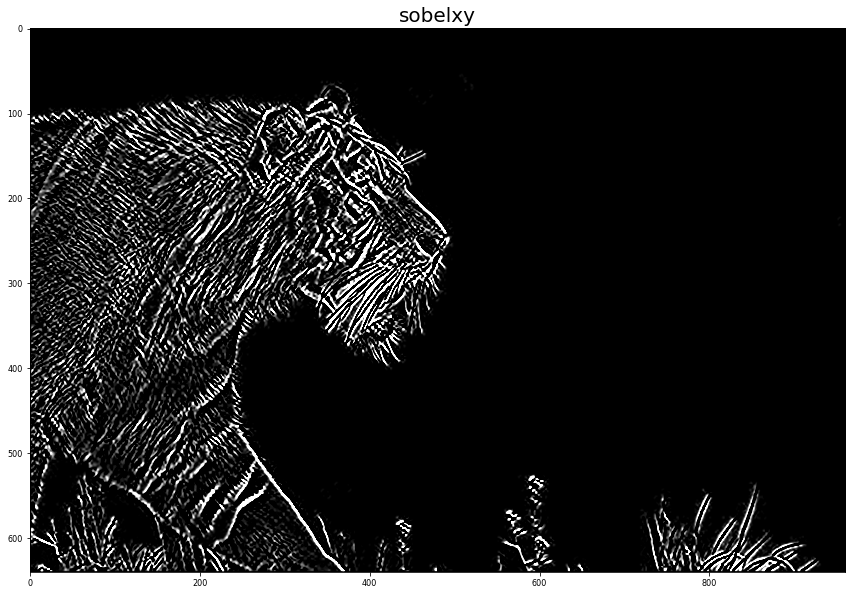

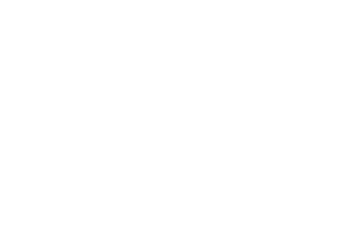

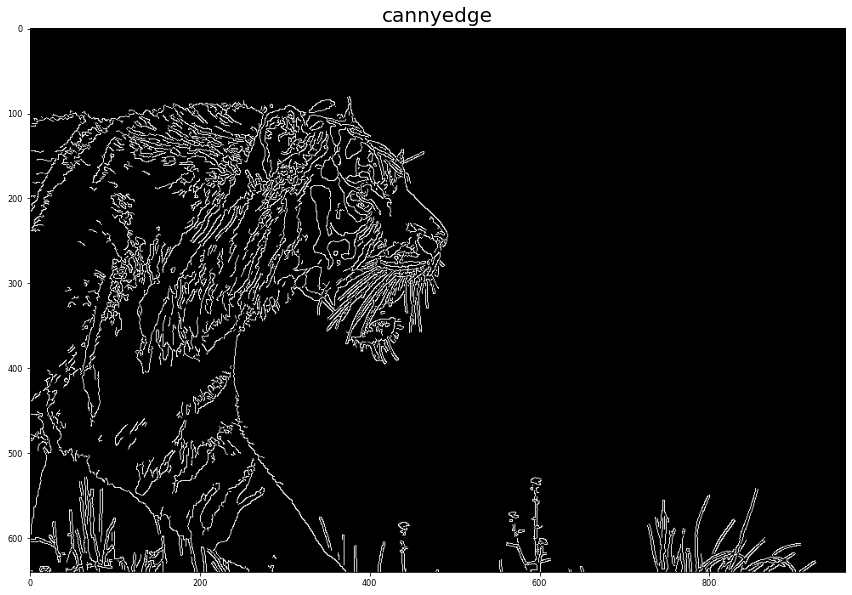

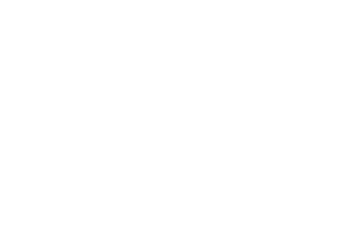

In [13]:
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

images=[sobelx,sobely,sobelxy,cannyedge]
title=["sobelx",'sobely','sobelxy','cannyedge']
for i in range(4):
    plt.figure(figsize=(20,10))
    plt.title(title[i], size=20), plt.imshow(images[i],cmap='gray',vmin = 0, vmax = 255)   
    plt.show()
    plt.axis('off')
#     plt.figure(figsize=(20,10)), plot_image(images[i], titles[i])

# sobel filter output

In [14]:
myimg=np.concatenate((np.array([np.ones(10)]*3),np.array([np.zeros(10)]*4)),axis=0)

In [15]:
myimg

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
cv2.Sobel(src=myimg, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-4., -4., -4., -4., -4., -4., -4., -4., -4., -4.],
       [-4., -4., -4., -4., -4., -4., -4., -4., -4., -4.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

### Image segmenation using clustering

In [19]:
image = cv2.imread(r"C:\Users\rajbo\Downloads\SRM_MTech\Deeplearning\images\cluster.png")

In [20]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

- We are going to use the cv2.kmeans() function, which takes a 2D array as input, and since our original image is 3D (width, height, and depth of 3 RGB values), we need to flatten the height and width into a single vector of pixels (3 RGB values):



In [22]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [24]:

#Alghorithm stops when some number of iterations is exceeded (say 100), or if the clusters move less than some epsilon value (let's pick 0.2 here)
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [26]:
#If you look at the image, there are three primary colors (green for trees, blue for the sea/lake, and white to orange for
#(the sky). As a result, we going to use three clusters for this image number of clusters (K) 

k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [27]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [28]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

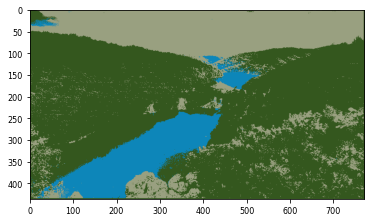

In [37]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

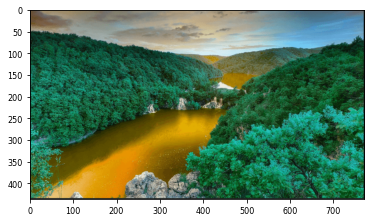

In [38]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))